# Major findings

- Wages Distribution across different occupation: Shows us how the wages range swings on the highest side for Occupations like Management, computer and mathematical sector and Legal occupation. When we look into the sectors for food industry and Healthcare support goes down on the wages

- Correlation between the job experience for declining jobs and automation probability: When looked into 30 declining jobs, 25 of them did not require any prior job experience. Hence proving the automation probability being high. But, if we look into the jobs which require 5 years or higher prior experince says the automation probability being low. 



In [1]:
#Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
# Store file paths in a variable
occupation_data_file = Path("Resources/national_M2022_dl.xlsx")
employment_data_file = Path("Resources/occupation.xlsx")
automation_file = Path("Resources/automation_data_by_state.csv")
occupation_gender_file = Path("Resources/cpsaat11.xlsx")

In [3]:
# Read the files into dataframes
occupation_group_data = pd.read_excel(occupation_data_file)
employment_data_df = pd.read_excel(employment_data_file, sheet_name ="Table 1.7",header=1)
job_decline_df = pd.read_excel(employment_data_file, sheet_name ="Table 1.6",header=1)
years_experience = pd.read_excel(employment_data_file, sheet_name ="Table 5.4",header=1)
automation_data = pd.read_csv(automation_file, encoding="ISO-8859-1")
occupation_gender_df = pd.read_excel(occupation_gender_file,header=None)

In [4]:
# Sample data of occupation_group_data dataframe
#occupation_group_data.sample(10)

In [5]:
# Columns
occupation_group_data.columns

Index(['AREA', 'AREA_TITLE', 'AREA_TYPE', 'PRIM_STATE', 'NAICS', 'NAICS_TITLE',
       'I_GROUP', 'OWN_CODE', 'OCC_CODE', 'OCC_TITLE', 'O_GROUP', 'TOT_EMP',
       'EMP_PRSE', 'JOBS_1000', 'LOC_QUOTIENT', 'PCT_TOTAL', 'PCT_RPT',
       'H_MEAN', 'A_MEAN', 'MEAN_PRSE', 'H_PCT10', 'H_PCT25', 'H_MEDIAN',
       'H_PCT75', 'H_PCT90', 'A_PCT10', 'A_PCT25', 'A_MEDIAN', 'A_PCT75',
       'A_PCT90', 'ANNUAL', 'HOURLY'],
      dtype='object')

In [6]:
# Select the requred columns-'OCC_CODE', 'OCC_TITLE', 'O_GROUP'
occupation_group_data = occupation_group_data[['OCC_CODE', 'OCC_TITLE', 'O_GROUP']]

In [7]:
# Rename the columns
occupation_group_data.rename(columns={'OCC_CODE':"2022 National Employment Matrix code",'OCC_TITLE' : "2022 National Employment Matrix title",'O_GROUP':"Occupation Group" },inplace=True)
occupation_group_data.head()

,2022 National Employment Matrix code,2022 National Employment Matrix title,Occupation Group
0,00-0000,All Occupations,total
1,11-0000,Management Occupations,major
2,11-1000,Top Executives,minor
3,11-1010,Chief Executives,broad
4,11-1011,Chief Executives,detailed


In [8]:
# Count of each column items
#occupation_group_data.count()

In [9]:
# Check for duplicate records
#occupation_group_data.duplicated().sample(10)

In [10]:
# Reset the index of employment_data_df dataframe
#employment_data_df.reset_index()

#employment_data_df.head()

,index,2022 National Employment Matrix title,2022 National Employment Matrix code,Occupation type,"Employment, 2022","Employment, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Percent self employed, 2022","Occupational openings, 2022-32 annual average","Median annual wage, 2022(1)",Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation
0,0,"Total, all occupations",00-0000,Summary,164482.6,169148.1,4665.5,2.8,6,18566.5,46310.0,—,—,—
1,1,Management occupations,11-0000,Summary,12574.7,13257.7,683.0,5.4,15.8,1053.1,107360.0,—,—,—
2,2,Top executives,11-1000,Summary,3832.2,3958.0,125.8,3.3,1.8,315.0,99890.0,—,—,—
3,3,Chief executives,11-1011,Line item,280.0,257.0,-23.0,-8.2,21.2,15.3,189520.0,Bachelor's degree,5 years or more,NaN
4,4,General and operations managers,11-1021,Line item,3507.8,3655.1,147.3,4.2,0.3,296.3,98100.0,Bachelor's degree,5 years or more,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1112,1112,"Material moving workers, all other",53-7199,Line item,26.1,27.0,0.9,3.5,3.1,3.2,38800.0,No formal educational credential,NaN,Short-term on-the-job training
1113,1113,Footnotes:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1114,1114,(1) Data are from the Occupational Employment ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1115,1115,Note: Data is unavailable for values denoted w...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
# Display the columns
#employment_data_df.columns

In [12]:
# Count of each column items
#employment_data_df.count()

In [13]:
# Remove the footer in the last 4 lines
employment_data_df = employment_data_df.drop(employment_data_df.index[-4:], axis=0)
#employment_data_df.tail()

In [14]:
# Count of each column items
#employment_data_df.count()

In [15]:
# merge the occupation_group_data and employment_data_df dataframes
employment_wage_education = pd.merge(occupation_group_data,employment_data_df ,on= ["2022 National Employment Matrix code","2022 National Employment Matrix code"])
#employment_wage_education.head(50)

In [16]:
# Drop the 2022 National Employment Matrix title_y column
employment_wage_education = employment_wage_education.drop("2022 National Employment Matrix title_y",axis=1)

# Rename the column 2022 National Employment Matrix title_x to 2022 National Employment Matrix title
employment_wage_education.rename(columns={"2022 National Employment Matrix title_x":"2022 National Employment Matrix title"},inplace = True)

In [17]:
# Count of each column items
#employment_wage_education.count()

In [18]:
# Display some sample data of automation_data dataframe
#automation_data.sample(50)

In [19]:
# Count of each column items
#automation_data.count()

In [20]:
# Rename the columns "SOC" to "2022 National Employment Matrix code" and "Probability" to "Automation Probability"
automation_data.rename(columns={"SOC":"2022 National Employment Matrix code","Probability":"Automation Probability"},inplace =True) 

In [21]:
#automation_data.head()

In [22]:
# Merge the employment_wage_education and automation_data dataframes
occupation_automation_df = pd.merge(employment_wage_education,automation_data,how="left",on=["2022 National Employment Matrix code","2022 National Employment Matrix code"])
#occupation_automation_df.head()

In [23]:
# Display the count of column items
#occupation_automation_df.columns
#occupation_automation_df.count()

In [24]:
# sample data of occupation_gender_df dataframe
#occupation_gender_df.reset_index()

#occupation_gender_df.head(50)

In [25]:
# Exculde the header rows
occupation_gender_df = occupation_gender_df.iloc[9:]

In [26]:
# Name columns
occupation_gender_df.columns = ["2022 National Employment Matrix code","2022 National Employment Matrix title","Total employed", "Women","White","Black or African American","Asian","Hispanic or Latino"]

In [27]:
# Merge occupation_automation_df,occupation_gender_df dataframes
occupation_data_complete = pd.merge(occupation_automation_df,occupation_gender_df,how = "left",on="2022 National Employment Matrix code")


In [28]:
#occupation_data_complete.columns

In [29]:
# Drop the 2022 National Employment Matrix title_y column
occupation_data_complete = occupation_data_complete.drop("2022 National Employment Matrix title_y",axis=1)

# Rename the column 2022 National Employment Matrix title_x to 2022 National Employment Matrix title
occupation_data_complete.rename(columns={"2022 National Employment Matrix title_x":"2022 National Employment Matrix title"},inplace = True)

In [64]:
#occupation_data_complete.count()

In [65]:
#occupation_data_complete.head(20)

In [32]:
# Create a dataframe for all the major sectors
#Employment_distribution_df= occupation_data_complete.loc[occupation_data_complete['Occupation Group'] == "major" ]
#Employment_distribution_df.count()



In [33]:
#Employment_distribution_df =Employment_distribution_df[["2022 National Employment Matrix title",'Employment, 2022','Employment, 2032']]
#Employment_distribution_df.set_index("2022 National Employment Matrix title")
#Employment_distribution_df["2022 National Employment Matrix title"] = Employment_distribution_df["2022 National Employment Matrix title"].str.replace("Occupations","")
#Employment_distribution_df = Employment_distribution_df.set_index("2022 National Employment Matrix title")
#Employment_distribution_df

In [34]:
#Employment_distribution_df.plot(kind="bar",xlabel='Major Employment Sectors',ylabel = "Employment (Numbers in thousands)", figsize=(10,4))

In [35]:
#occupation_data_complete.columns

In [40]:
# Occupations that are highly impacted by automation
occupation_detailed = occupation_data_complete[occupation_data_complete['Occupation Group']=="detailed"]
occupation_detailed.columns
occupation_automation = occupation_detailed[['2022 National Employment Matrix title',"Automation Probability"] ]

occupation_automation.dropna()
occupation_automation_sorted = occupation_automation.sort_values("Automation Probability",ascending=False)
#occupation_automation_sorted.head(50)



In [41]:
# Fastest growing occupations- employment change percenatge > 18%
#fastest_growing_occ  =occupation_detailed.loc[occupation_detailed['Employment change, percent, 2022-32'] > 18.0]
#fastest_growing_occ = fastest_growing_occ[["2022 National Employment Matrix title",'Employment change, percent, 2022-32']]
#fastest_growing_occ

In [42]:
# Fastest declining occupations- employment change percenatge < 0%
#fastest_declining_occ  =occupation_detailed.loc[occupation_detailed['Employment change, percent, 2022-32'] < 0.0]
#fastest_declining_occ = fastest_declining_occ[["2022 National Employment Matrix title",'Employment change, percent, 2022-32']]
#fastest_declining_occ

In [44]:
#Ranjini's work starts here:
occupation_detailed

,2022 National Employment Matrix code,2022 National Employment Matrix title,Occupation Group,Occupation type,"Employment, 2022","Employment, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Percent self employed, 2022","Occupational openings, 2022-32 annual average",...,Washington,West Virginia,Wisconsin,Wyoming,Total employed,Women,White,Black or African American,Asian,Hispanic or Latino
3,11-1011,Chief Executives,detailed,Line item,280.0,257.0,-23.0,-8.2,21.2,15.3,...,5910.0,980.0,3740.0,160.0,1780,29.2,85.9,5.9,6.7,6.8
4,11-1021,General and Operations Managers,detailed,Line item,3507.8,3655.1,147.3,4.2,0.3,296.3,...,43760.0,10200.0,32350.0,4840.0,1165,35.4,82.4,9.1,5.3,11.5
5,11-1031,Legislators,detailed,Line item,44.4,46.0,1.5,3.4,—,3.4,...,NaN,NaN,NaN,NaN,14,–,–,–,–,–
7,11-2011,Advertising and Promotions Managers,detailed,Line item,30.9,31.4,0.6,1.9,27,2.8,...,640.0,40.0,200.0,0.0,68,49.7,80.3,13.8,4.4,8.9
9,11-2021,Marketing Managers,detailed,Line item,358.2,381.9,23.7,6.6,5.3,31.2,...,5830.0,260.0,2980.0,30.0,656,58.9,83.9,6.8,7.5,11.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,53-7072,"Pump Operators, Except Wellhead Pumpers",detailed,Line item,11.2,11.6,0.4,3.6,—,1.2,...,0.0,110.0,80.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1115,53-7073,Wellhead Pumpers,detailed,Line item,16.2,15.9,-0.4,-2.2,0.4,1.6,...,0.0,550.0,0.0,550.0,NaN,NaN,NaN,NaN,NaN,NaN
1116,53-7081,Refuse and Recyclable Material Collectors,detailed,Line item,146.4,151.1,4.7,3.2,7.6,18.6,...,1890.0,970.0,2140.0,230.0,112,10.6,69.6,25.8,1.6,26.7
1117,53-7121,"Tank Car, Truck, and Ship Loaders",detailed,Line item,13.3,13.5,0.2,1.6,3.3,1.6,...,350.0,0.0,190.0,80.0,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
wages_data = occupation_detailed[["2022 National Employment Matrix code", "2022 National Employment Matrix title", "Median annual wage, 2022(1)"]]

In [46]:
wages_data

,2022 National Employment Matrix code,2022 National Employment Matrix title,"Median annual wage, 2022(1)"
3,11-1011,Chief Executives,189520.0
4,11-1021,General and Operations Managers,98100.0
5,11-1031,Legislators,48090.0
7,11-2011,Advertising and Promotions Managers,127830.0
9,11-2021,Marketing Managers,140040.0
...,...,...,...
1114,53-7072,"Pump Operators, Except Wellhead Pumpers",55860.0
1115,53-7073,Wellhead Pumpers,63280.0
1116,53-7081,Refuse and Recyclable Material Collectors,43540.0
1117,53-7121,"Tank Car, Truck, and Ship Loaders",53930.0


In [47]:
#creating a Bar plot 
wages_data_df= occupation_data_complete.loc[occupation_data_complete['Occupation Group'] == "major"]
wages_data_df=wages_data_df[["2022 National Employment Matrix title", "Median annual wage, 2022(1)"]]
wages_data_df["2022 National Employment Matrix title"]=wages_data_df["2022 National Employment Matrix title"].str.replace("Occupations", "")
wages_data_df.set_index("2022 National Employment Matrix title", inplace=True)
wages_data_df.count()

Median annual wage, 2022(1)    22
dtype: int64

Text(0.5, 1.0, 'Distribution of Wages for different sectors')

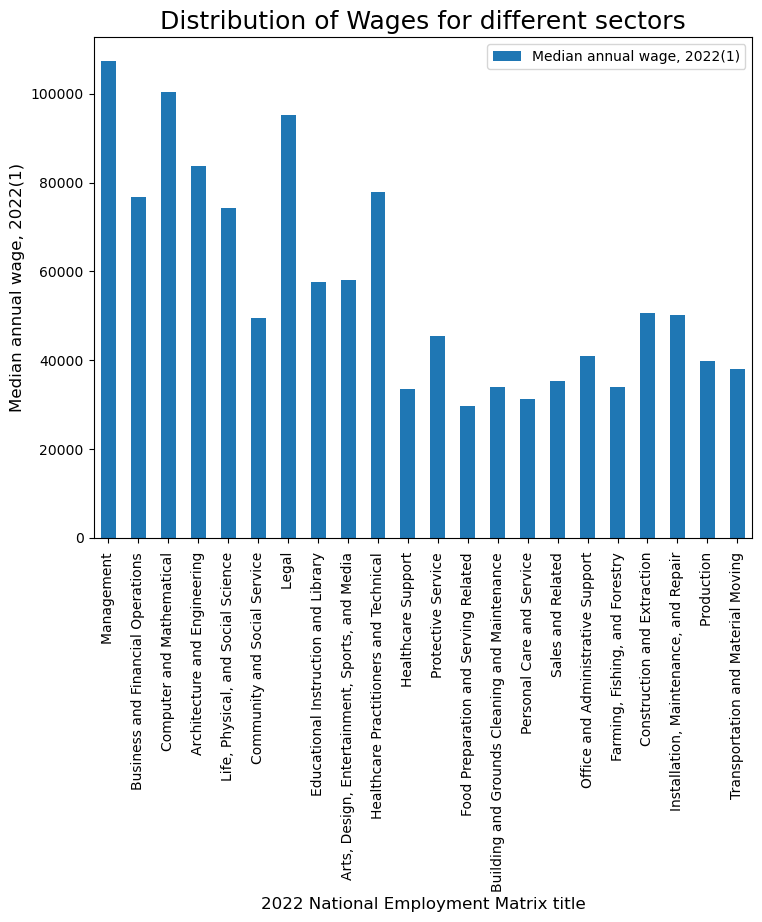

In [48]:
line_graph = wages_data_df.plot(kind="bar", figsize = (8.5,6.5))
line_graph.set_xlabel ("2022 National Employment Matrix title", size = 12)
line_graph.set_ylabel ("Median annual wage, 2022(1)", size = 12)
plt.title("Distribution of Wages for different sectors", size = 18)


# Bar Graph

Bar graph above gives us the information about the wages across different sector.

In [49]:
job_decline_df

,2022 National Employment Matrix title,2022 National Employment Matrix code,"Employment, 2022","Employment, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Median annual wage, 2022(1)"
0,"Total, all occupations",00-0000,164482.6,169148.1,4665.5,2.8,46310.0
1,Cashiers,41-2011,3345.8,2997.7,-348.1,-10.4,28240.0
2,"Secretaries and administrative assistants, e...",43-6014,2030.2,1794.3,-235.9,-11.6,41000.0
3,"Office clerks, general",43-9061,2668.2,2492.8,-175.4,-6.6,38040.0
4,Customer service representatives,43-4051,2982.9,2820.2,-162.7,-5.5,37780.0
5,Miscellaneous assemblers and fabricators,51-2090,1500.4,1388.6,-111.8,-7.5,37280.0
6,"Bookkeeping, accounting, and auditing clerks",43-3031,1735.8,1627.5,-108.3,-6.2,45860.0
7,Executive secretaries and executive administ...,43-6011,511.1,403.0,-108.1,-21.1,65980.0
8,"Cooks, fast food",35-2011,742.0,640.4,-101.6,-13.7,27640.0
9,First-line supervisors of retail sales workers,41-1011,1405.8,1311.8,-94.0,-6.7,45250.0


In [50]:
# Remove the footer in the last 4 lines
job_decline_df = job_decline_df.drop(job_decline_df.index[-3:], axis=0)
job_decline_df.tail()

,2022 National Employment Matrix title,2022 National Employment Matrix code,"Employment, 2022","Employment, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Median annual wage, 2022(1)"
26,Postal service mail carriers,43-5052,314.5,293.5,-21.0,-6.7,54250.0
27,"Cutting, punching, and press machine setters...",51-4031,184.8,164.7,-20.1,-10.9,39340.0
28,Bill and account collectors,43-3011,209.7,189.6,-20.1,-9.6,39470.0
29,Telemarketers,41-9041,97.7,77.6,-20.1,-20.6,31030.0
30,Childcare workers,39-9011,945.9,927.4,-18.5,-2.0,28520.0


In [51]:
job_decline_df

,2022 National Employment Matrix title,2022 National Employment Matrix code,"Employment, 2022","Employment, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Median annual wage, 2022(1)"
0,"Total, all occupations",00-0000,164482.6,169148.1,4665.5,2.8,46310.0
1,Cashiers,41-2011,3345.8,2997.7,-348.1,-10.4,28240.0
2,"Secretaries and administrative assistants, e...",43-6014,2030.2,1794.3,-235.9,-11.6,41000.0
3,"Office clerks, general",43-9061,2668.2,2492.8,-175.4,-6.6,38040.0
4,Customer service representatives,43-4051,2982.9,2820.2,-162.7,-5.5,37780.0
5,Miscellaneous assemblers and fabricators,51-2090,1500.4,1388.6,-111.8,-7.5,37280.0
6,"Bookkeeping, accounting, and auditing clerks",43-3031,1735.8,1627.5,-108.3,-6.2,45860.0
7,Executive secretaries and executive administ...,43-6011,511.1,403.0,-108.1,-21.1,65980.0
8,"Cooks, fast food",35-2011,742.0,640.4,-101.6,-13.7,27640.0
9,First-line supervisors of retail sales workers,41-1011,1405.8,1311.8,-94.0,-6.7,45250.0


In [52]:
years_experience

,2022 National Employment Matrix title,2022 National Employment Matrix code,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation
0,Chief executives,11-1011,Bachelor's degree,5 years or more,NaN
1,General and operations managers,11-1021,Bachelor's degree,5 years or more,NaN
2,Legislators,11-1031,Bachelor's degree,Less than 5 years,NaN
3,Advertising and promotions managers,11-2011,Bachelor's degree,Less than 5 years,NaN
4,Marketing managers,11-2021,Bachelor's degree,5 years or more,NaN
...,...,...,...,...,...
828,Wellhead pumpers,53-7073,High school diploma or equivalent,Less than 5 years,Moderate-term on-the-job training
829,Refuse and recyclable material collectors,53-7081,No formal educational credential,NaN,Short-term on-the-job training
830,"Tank car, truck, and ship loaders",53-7121,No formal educational credential,NaN,Short-term on-the-job training
831,"Material moving workers, all other",53-7199,No formal educational credential,NaN,Short-term on-the-job training


In [53]:
years_experience=years_experience.fillna(0)

In [54]:
years_experience

,2022 National Employment Matrix title,2022 National Employment Matrix code,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation
0,Chief executives,11-1011,Bachelor's degree,5 years or more,0
1,General and operations managers,11-1021,Bachelor's degree,5 years or more,0
2,Legislators,11-1031,Bachelor's degree,Less than 5 years,0
3,Advertising and promotions managers,11-2011,Bachelor's degree,Less than 5 years,0
4,Marketing managers,11-2021,Bachelor's degree,5 years or more,0
...,...,...,...,...,...
828,Wellhead pumpers,53-7073,High school diploma or equivalent,Less than 5 years,Moderate-term on-the-job training
829,Refuse and recyclable material collectors,53-7081,No formal educational credential,0,Short-term on-the-job training
830,"Tank car, truck, and ship loaders",53-7121,No formal educational credential,0,Short-term on-the-job training
831,"Material moving workers, all other",53-7199,No formal educational credential,0,Short-term on-the-job training


In [55]:
#merging data frames
main_data = pd.merge(job_decline_df, years_experience, how = "left",on="2022 National Employment Matrix code")

In [56]:
main_data=main_data.fillna(0)
main_data

,2022 National Employment Matrix title_x,2022 National Employment Matrix code,"Employment, 2022","Employment, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Median annual wage, 2022(1)",2022 National Employment Matrix title_y,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation
0,"Total, all occupations",00-0000,164482.6,169148.1,4665.5,2.8,46310.0,0,0,0,0
1,Cashiers,41-2011,3345.8,2997.7,-348.1,-10.4,28240.0,Cashiers,No formal educational credential,0,Short-term on-the-job training
2,"Secretaries and administrative assistants, e...",43-6014,2030.2,1794.3,-235.9,-11.6,41000.0,"Secretaries and administrative assistants, exc...",High school diploma or equivalent,0,Short-term on-the-job training
3,"Office clerks, general",43-9061,2668.2,2492.8,-175.4,-6.6,38040.0,"Office clerks, general",High school diploma or equivalent,0,Short-term on-the-job training
4,Customer service representatives,43-4051,2982.9,2820.2,-162.7,-5.5,37780.0,Customer service representatives,High school diploma or equivalent,0,Short-term on-the-job training
5,Miscellaneous assemblers and fabricators,51-2090,1500.4,1388.6,-111.8,-7.5,37280.0,Miscellaneous assemblers and fabricators,High school diploma or equivalent,0,Moderate-term on-the-job training
6,"Bookkeeping, accounting, and auditing clerks",43-3031,1735.8,1627.5,-108.3,-6.2,45860.0,"Bookkeeping, accounting, and auditing clerks","Some college, no degree",0,Moderate-term on-the-job training
7,Executive secretaries and executive administ...,43-6011,511.1,403.0,-108.1,-21.1,65980.0,Executive secretaries and executive administra...,High school diploma or equivalent,Less than 5 years,0
8,"Cooks, fast food",35-2011,742.0,640.4,-101.6,-13.7,27640.0,"Cooks, fast food",No formal educational credential,0,Short-term on-the-job training
9,First-line supervisors of retail sales workers,41-1011,1405.8,1311.8,-94.0,-6.7,45250.0,First-line supervisors of retail sales workers,High school diploma or equivalent,Less than 5 years,0


In [57]:
main_data.columns

Index(['2022 National Employment Matrix title_x',
       '2022 National Employment Matrix code', 'Employment, 2022',
       'Employment, 2032', 'Employment change, numeric, 2022-32',
       'Employment change, percent, 2022-32', 'Median annual wage, 2022(1)',
       '2022 National Employment Matrix title_y',
       'Typical education needed for entry',
       'Work experience in a related occupation',
       'Typical on-the-job training needed to attain competency in the occupation'],
      dtype='object')

In [58]:
main_data_df=main_data[["2022 National Employment Matrix title_x", "Employment change, percent, 2022-32", "Work experience in a related occupation"]]
main_data_df

,2022 National Employment Matrix title_x,"Employment change, percent, 2022-32",Work experience in a related occupation
0,"Total, all occupations",2.8,0
1,Cashiers,-10.4,0
2,"Secretaries and administrative assistants, e...",-11.6,0
3,"Office clerks, general",-6.6,0
4,Customer service representatives,-5.5,0
5,Miscellaneous assemblers and fabricators,-7.5,0
6,"Bookkeeping, accounting, and auditing clerks",-6.2,0
7,Executive secretaries and executive administ...,-21.1,Less than 5 years
8,"Cooks, fast food",-13.7,0
9,First-line supervisors of retail sales workers,-6.7,Less than 5 years


In [59]:
new_data= pd.merge(main_data, automation_data, how = "left",on="2022 National Employment Matrix code")
new_data

,2022 National Employment Matrix title_x,2022 National Employment Matrix code,"Employment, 2022","Employment, 2032","Employment change, numeric, 2022-32","Employment change, percent, 2022-32","Median annual wage, 2022(1)",2022 National Employment Matrix title_y,Typical education needed for entry,Work experience in a related occupation,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Total, all occupations",00-0000,164482.6,169148.1,4665.5,2.8,46310.0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cashiers,41-2011,3345.8,2997.7,-348.1,-10.4,28240.0,Cashiers,No formal educational credential,0,...,13200.0,72320.0,272270.0,28080.0,9700.0,108920.0,65350.0,22390.0,61290.0,6880.0
2,"Secretaries and administrative assistants, e...",43-6014,2030.2,1794.3,-235.9,-11.6,41000.0,"Secretaries and administrative assistants, exc...",High school diploma or equivalent,0,...,5840.0,55480.0,176670.0,29370.0,5970.0,41600.0,38120.0,9180.0,18720.0,4730.0
3,"Office clerks, general",43-9061,2668.2,2492.8,-175.4,-6.6,38040.0,"Office clerks, general",High school diploma or equivalent,0,...,3670.0,53250.0,363020.0,25980.0,1750.0,87200.0,61810.0,24630.0,84250.0,6560.0
4,Customer service representatives,43-4051,2982.9,2820.2,-162.7,-5.5,37780.0,Customer service representatives,High school diploma or equivalent,0,...,7710.0,59650.0,257600.0,44480.0,3470.0,62410.0,55680.0,11610.0,60650.0,1440.0
5,Miscellaneous assemblers and fabricators,51-2090,1500.4,1388.6,-111.8,-7.5,37280.0,Miscellaneous assemblers and fabricators,High school diploma or equivalent,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"Bookkeeping, accounting, and auditing clerks",43-3031,1735.8,1627.5,-108.3,-6.2,45860.0,"Bookkeeping, accounting, and auditing clerks","Some college, no degree",0,...,9610.0,30160.0,125140.0,13560.0,5450.0,39810.0,35630.0,6900.0,32880.0,3260.0
7,Executive secretaries and executive administ...,43-6011,511.1,403.0,-108.1,-21.1,65980.0,Executive secretaries and executive administra...,High school diploma or equivalent,Less than 5 years,...,2660.0,8910.0,41800.0,5110.0,2130.0,14680.0,9290.0,1420.0,6680.0,650.0
8,"Cooks, fast food",35-2011,742.0,640.4,-101.6,-13.7,27640.0,"Cooks, fast food",No formal educational credential,0,...,1940.0,14390.0,51680.0,2650.0,640.0,13490.0,5420.0,1720.0,4630.0,1030.0
9,First-line supervisors of retail sales workers,41-1011,1405.8,1311.8,-94.0,-6.7,45250.0,First-line supervisors of retail sales workers,High school diploma or equivalent,Less than 5 years,...,2970.0,30190.0,98400.0,9700.0,2600.0,32530.0,22040.0,8080.0,16110.0,2770.0


In [60]:
new_data_df=new_data[["2022 National Employment Matrix title_x", "Employment change, percent, 2022-32", "Work experience in a related occupation", "Automation Probability"]]
#new_data_df

In [61]:
new_data_df=new_data_df.fillna(0)
#new_data_df

In [62]:
new_data_df.sort_values('Employment change, percent, 2022-32')

,2022 National Employment Matrix title_x,"Employment change, percent, 2022-32",Work experience in a related occupation,Automation Probability
16,Data entry keyers,-26.0,0,0.990
19,Legal secretaries and administrative assistants,-21.8,0,0.980
7,Executive secretaries and executive administ...,-21.1,Less than 5 years,0.860
29,Telemarketers,-20.6,0,0.990
22,Order clerks,-18.2,0,0.980
21,Payroll and timekeeping clerks,-16.4,0,0.970
25,Sewing machine operators,-15.2,0,0.890
14,Tellers,-14.5,0,0.980
8,"Cooks, fast food",-13.7,0,0.810
2,"Secretaries and administrative assistants, e...",-11.6,0,0.960


In [63]:
new_data_df.sort_values('Automation Probability',ascending=False)

,2022 National Employment Matrix title_x,"Employment change, percent, 2022-32",Work experience in a related occupation,Automation Probability
29,Telemarketers,-20.6,0,0.990
16,Data entry keyers,-26.0,0,0.990
12,"Shipping, receiving, and inventory clerks",-8.4,0,0.980
22,Order clerks,-18.2,0,0.980
6,"Bookkeeping, accounting, and auditing clerks",-6.2,0,0.980
19,Legal secretaries and administrative assistants,-21.8,0,0.980
24,"Inspectors, testers, sorters, samplers, and ...",-3.9,0,0.980
14,Tellers,-14.5,0,0.980
1,Cashiers,-10.4,0,0.970
21,Payroll and timekeeping clerks,-16.4,0,0.970


# Table output

2 of the tables above shows Correlation between the job experience for declining jobs and automation probability.